In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../')
from utils.RSI import output_rsi_time_series

In [2]:
#パラメータ
start = '2020-01-01'
end = '2021-10-20'
posses = {'JPY':10000,'USD':0}

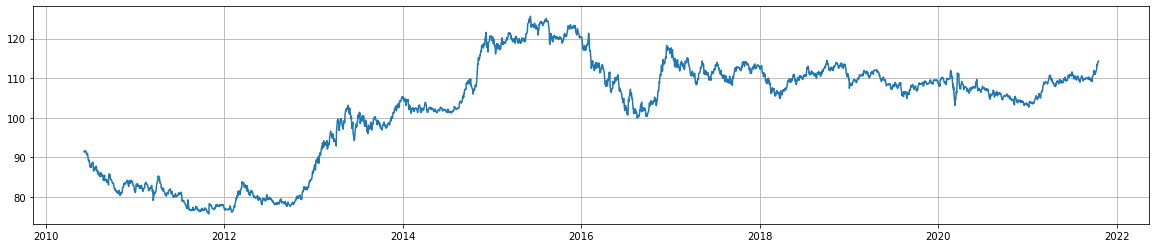

In [3]:
jpy_usd = pd.read_csv('../temp_data/jpy_usd.csv')
jpy_usd.index = pd.to_datetime(jpy_usd['Date'])
del jpy_usd['Date']
jpy_usd = jpy_usd[:end]
plt.figure(figsize=(20,4))
plt.plot(jpy_usd['Close'])
plt.grid()
plt.show()

In [4]:
jpy_usd = jpy_usd.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

param: 4
シャープレシオ: -1.934499716209218
最終収支: [10069.28747601]


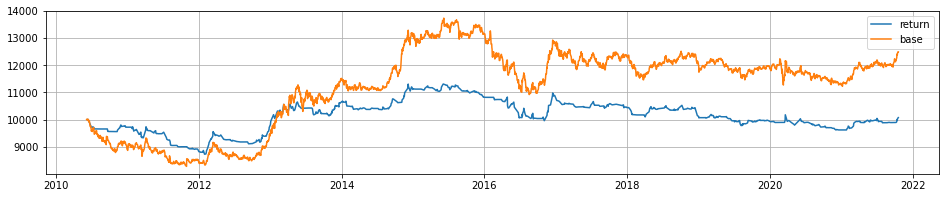

param: 5
シャープレシオ: -0.9405968467590162
最終収支: [10694.00317409]


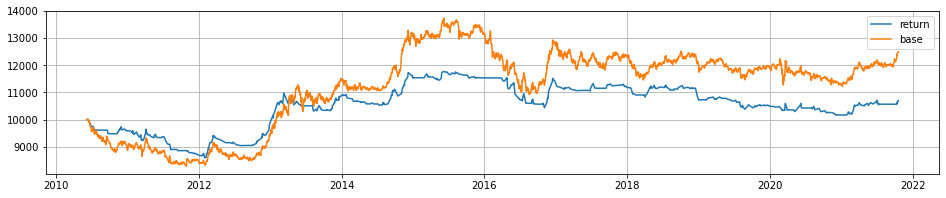

param: 6
シャープレシオ: -0.26073246318119875
最終収支: [10845.44840843]


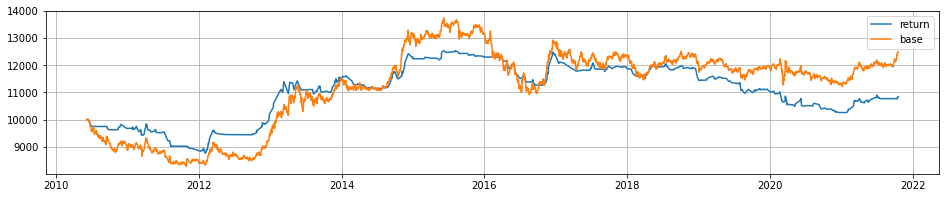

param: 7
シャープレシオ: -0.1656722624895441
最終収支: [10940.56139721]


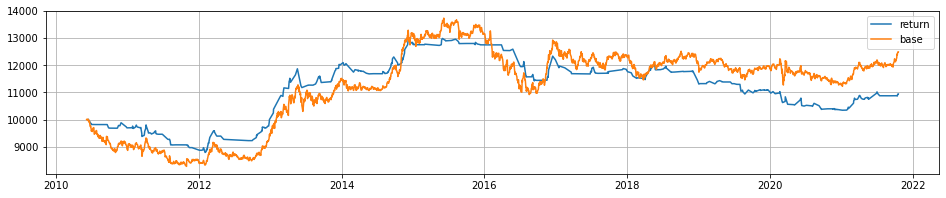

param: 8
シャープレシオ: -0.4273916529241548
最終収支: [10407.24133295]


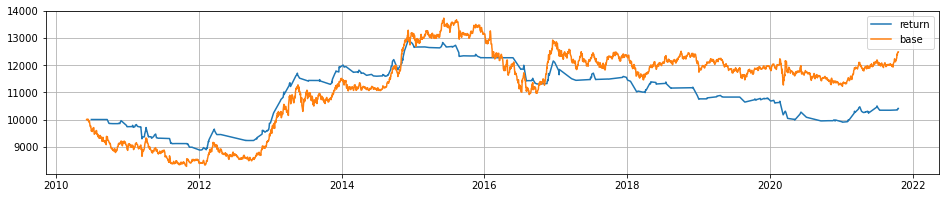

param: 9
シャープレシオ: -0.6916957182932717
最終収支: [10010.99863898]


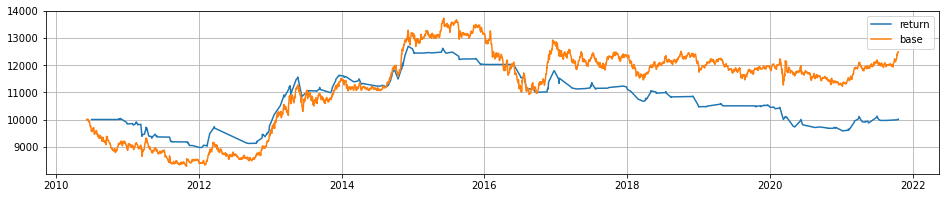

param: 10
シャープレシオ: -0.6589338083008934
最終収支: [10366.52266439]


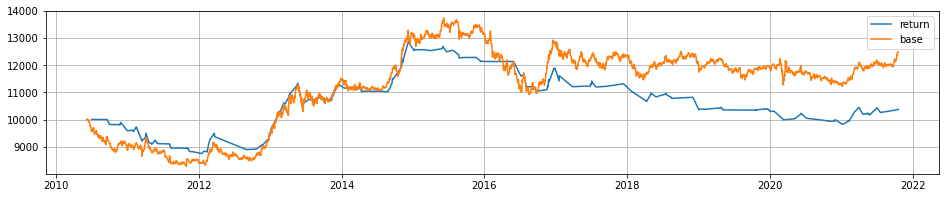

param: 11
シャープレシオ: -0.12511563370876574
最終収支: [11677.51534717]


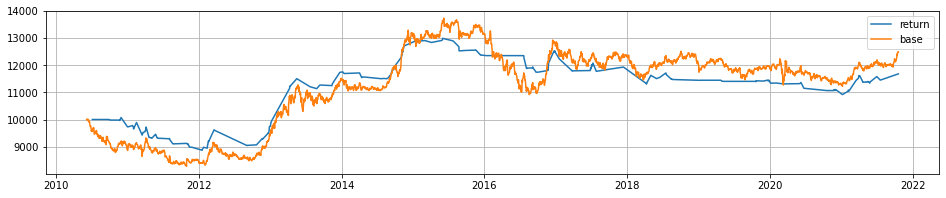

param: 12
シャープレシオ: -0.1238438057098381
最終収支: [12047.06863223]


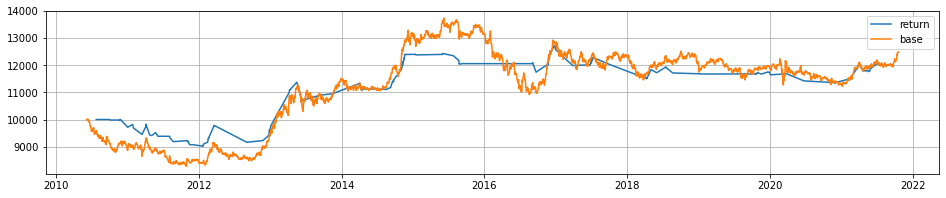

param: 13
シャープレシオ: 0.09110038270625001
最終収支: [12478.86115498]


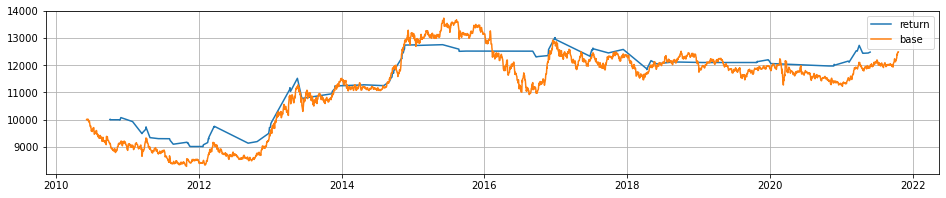

param: 14
シャープレシオ: -0.29336258988506303
最終収支: [11908.27465295]


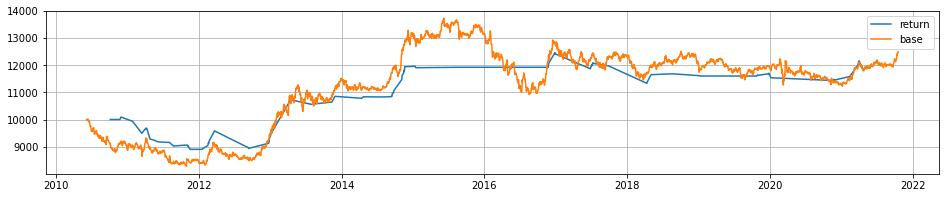

param: 15
シャープレシオ: -0.5479282480863772
最終収支: [11413.45064694]


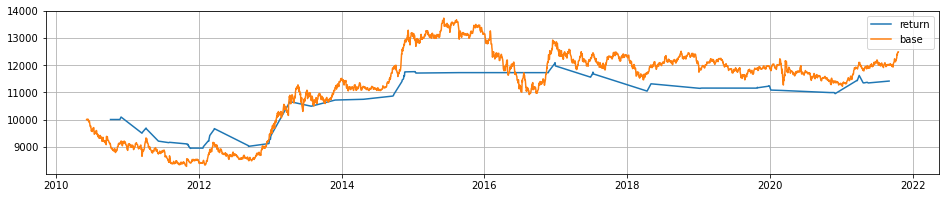

param: 16
シャープレシオ: 0.12466592378600441
最終収支: [12292.9101152]


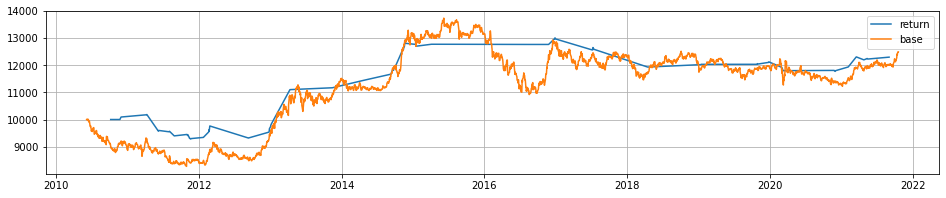

param: 17
シャープレシオ: 0.053422731320276994
最終収支: [12299.72819225]


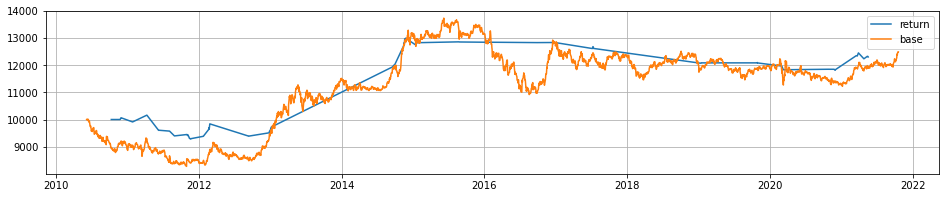

param: 18
シャープレシオ: 0.46426804019008944
最終収支: [13282.01832296]


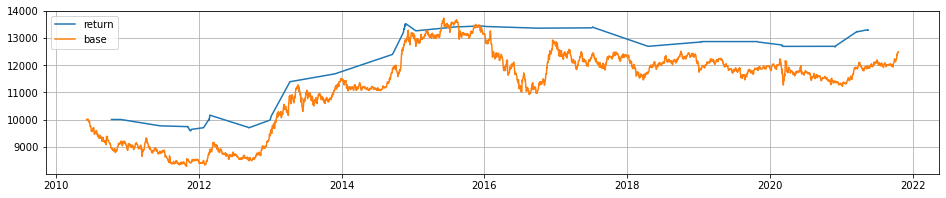

param: 19
シャープレシオ: 0.3865120568703417
最終収支: [13001.53705104]


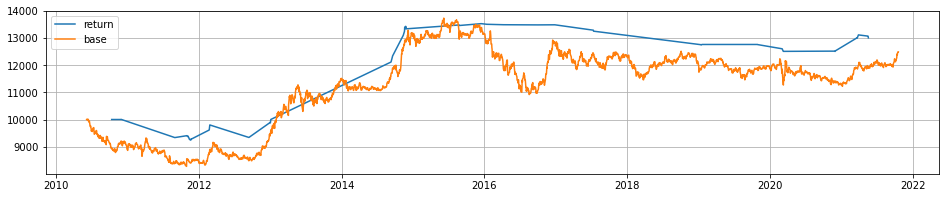

In [5]:
import warnings
warnings.simplefilter('ignore')

max_sharp = 0

for param in range(4,20):

    print('param:',param)
    #RSIの計算
    jpy_usd['RSI_'+str(param)] = output_rsi_time_series(jpy_usd['Close'],param=param)
    jpy_usd['buy_sell_flag'] = 0
    jpy_usd.loc[jpy_usd['RSI_'+str(param)]>=70,'buy_sell_flag'] = 'sell'
    jpy_usd.loc[jpy_usd['RSI_'+str(param)]<=30,'buy_sell_flag'] = 'buy'
    
    #バックテスト
    rec = []
    posses_ = {'JPY':10000,'USD':0}
    for i in range(len(jpy_usd)):
        if jpy_usd['buy_sell_flag'][i]=='buy':
            posses_['JPY'] += posses_['USD']*0.5*jpy_usd.iloc[i,0]
            posses_['USD'] = posses_['USD']*0.5
            rec.append([jpy_usd.iloc[i,:].name,posses_['JPY']+posses_['USD']*jpy_usd.iloc[i,0]])

        elif jpy_usd['buy_sell_flag'][i]=='sell':
            posses_['USD'] += posses_['JPY']*0.5/jpy_usd.iloc[i,0]
            posses_['JPY'] = posses_['JPY']*0.5
            rec.append([jpy_usd.iloc[i,:].name,posses_['JPY']+posses_['USD']*jpy_usd.iloc[i,0]])
    
    #シャープレシオ計算
    rec = pd.DataFrame(rec,columns=['date','value'])
    risk = rec['value'].std()/10000
    ret = (rec['value'].mean()-10000)/10000
    base = jpy_usd['Close']/jpy_usd['Close'][0]*10000
    base_ret = (base.mean()-10000)/10000
    sharp = (ret-base_ret)/risk
    print('シャープレシオ:',sharp)
    
    print('最終収支:',rec['value'].tail(1).values)
    
    plt.figure(figsize=(16,3))
    plt.grid()
    plt.plot(rec['date'],rec['value'])
    plt.plot(base)
    plt.legend(['return','base'])
    plt.show()
    
    #最高記録
    if max_sharp < sharp:
        max_sharp = sharp
        max_param = param